In [19]:
# import Pkg; 
# Pkg.add("CSV");
# Pkg.add("PolygonOps")
# Pkg.add("StaticArrays")

In [4]:
using CSV, DataFrames, Plots

In [7]:
demanda = CSV.read("demanda.csv", DataFrame, header=2, limit=476) #Toma los primeros 476 datos, sin 2 filas (encabezado)
zip_codes = CSV.read("zip.csv", DataFrame) #Toma la info de ZIP Codes
demanda = demanda[!,[1,22,23]] # Se queda con 2019
rename!(demanda,[:ZIP, :TotalGallons, :TotalStations])
conversion_factor = 3.78541*12 # liters/gallon * kms/liter
demanda[!,:TotalKms] = demanda[!,:TotalGallons] * conversion_factor # En Kms
data = innerjoin(demanda,zip_codes, on=:ZIP) # Agrega los datos de ZIP Codes por zona

,ZIP,TotalGallons,TotalStations,TotalKms,LAT,LNG
,Int64,Int64,Int64,Float64,Float64,Float64
1,90001,12471266,7,5.66506e8,33.974,-118.25
2,90003,22195762,12,1.00824e9,33.9641,-118.273
3,90004,12093863,9,5.49363e8,34.0762,-118.311
4,90007,18818231,8,8.54817e8,34.0281,-118.285
5,90016,20203517,13,9.17743e8,34.0283,-118.354
6,90019,21177617,7,9.61992e8,34.0498,-118.338
7,90022,21944459,9,9.96825e8,34.0237,-118.156
8,90023,16678269,9,7.57609e8,34.0225,-118.2
9,90025,18492834,12,8.40036e8,34.0454,-118.446


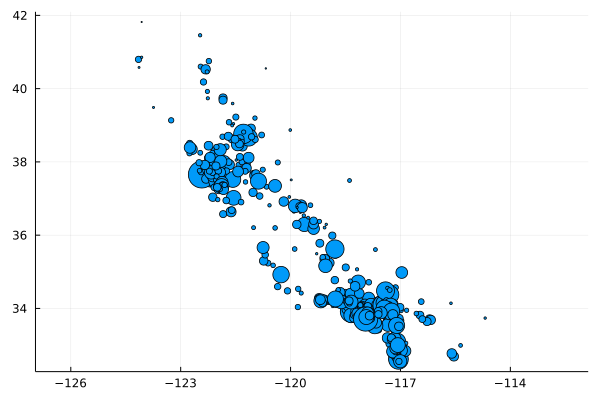

In [12]:
scatter(data[!,:LNG], data[!,:LAT], 
        markersize=data[!,:TotalKms]/maximum(data[!,:TotalKms])*15, 
        aspectratio=:equal,
        legend=:none)

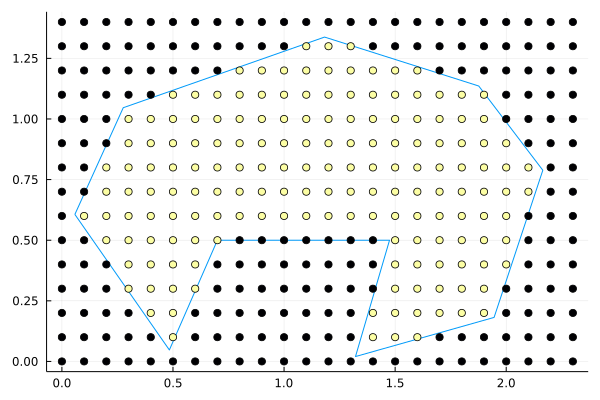

In [31]:
using PolygonOps
using StaticArrays

xv = [ 0.05840, 0.48375, 0.700000001, 1.47478, 1.32158, 
        1.94545, 2.16477, 1.87639, 1.18218, 0.27615, 
        0.05840 ]
yv = [ 0.60628, 0.04728, 0.50000, 0.50000, 0.02015, 
        0.18161, 0.78850, 1.13589, 1.33781, 1.04650, 
        0.60628 ]

xa = 0:0.1:2.3
ya = 0:0.1:1.4

polygon = SVector.(xv,yv)
points = vec(SVector.(xa',ya))

inside = [inpolygon(p, polygon; in=true, on=false, out=false) for p in points]

using Plots
plot(Tuple.(polygon), legend=false)
scatter!(Tuple.(points), marker_z=inside)